# Topic:        Challenge Set 1
# Subject:      Explore MTA turnstile data
# Date:         10/01/2018
# Name:         Amine Naouas
# Worked with:  -

In [376]:
from __future__ import print_function, division

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [378]:
import datetime

In [379]:
# pandas' options
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

#### Challenge 1

In [380]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917,160924]
turnstiles_df = get_data(week_nums)

In [381]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [382]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [383]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [384]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [385]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [386]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,05:00:00,REGULAR,5554,271
192674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,09:00:00,REGULAR,5554,271
192675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,13:00:00,REGULAR,5554,271
192676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,17:00:00,REGULAR,5554,271
192677,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/23/2016,21:00:00,REGULAR,5554,271


In [387]:
# Four weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
              ...  
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
09/17/2016    27381
09/18/2016    27320
09/19/2016    27551
09/20/2016    27812
09/21/2016    28151
09/22/2016    27221
09/23/2016    27242
Name: DATE, Length: 28, dtype: int64


#### Challenge 2


In [388]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [389]:
from datetime import datetime as dt

In [390]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [391]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [392]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
515719,R155,R116,01-00-02,50 ST,2016-09-17 16:00:00,1
515710,R155,R116,01-00-02,50 ST,2016-09-16 04:00:00,1
515711,R155,R116,01-00-02,50 ST,2016-09-16 08:00:00,1
515712,R155,R116,01-00-02,50 ST,2016-09-16 12:00:00,1


* No more duplicate Entries

In [393]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Challenge 3


In [394]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [395]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [396]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [397]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5.800e+06
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5.801e+06
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5.802e+06
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5.804e+06


In [398]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
127906,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/19/2016,5554,09/18/2016,5554.0
127907,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2016,5554,09/19/2016,5554.0
127908,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2016,5554,09/20/2016,5554.0
127909,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2016,5554,09/21/2016,5554.0
127910,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2016,5554,09/22/2016,5554.0


In [399]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [400]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
953,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,8.877e+08
954,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,8.877e+08
955,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,8.877e+08
956,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,8.877e+08
957,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,8.877e+08


In [401]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 100 k, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

194 1894869683.0
262183 67111299.0
8027692 32455.0
5569969 4664205.0
654311433 97.0
6 823326.0
63 1054429.0
40 761865.0
209 226941.0
49 197014.0
162 138897.0
504 138892.0
180 287696.0
387 122134.0
2275 1298473.0
2138 705433.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
262144 290.0
67108864 0.0
449 4662193.0
335600216 1374824.0
16827861 75577.0
36 3252790.0
1117 3665497.0
262269 10823938.0
0 694516.0
1452 1460387.0
69 238243.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
3012 125453.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
21 239579.0
2123 9170483.0
428 2336204.0
493 563884.0
316 174596.0
1024 12498870.0


In [402]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5.800e+06,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5.801e+06,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5.802e+06,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5.804e+06,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5.805e+06,1607.0


#### Challenge 4


In [403]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [404]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5.800e+06,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5.801e+06,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5.802e+06,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5.804e+06,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5.805e+06,1607.0


In [405]:
mask = ((turnstiles_daily["C/A"] == "A002") & 
        (turnstiles_daily["UNIT"] == "R051") & 
        (turnstiles_daily["SCP"] == "02-00-00") & 
        (turnstiles_daily["STATION"] == "59 ST"))
dates=turnstiles_daily[mask].DATE
counts=turnstiles_daily[mask].DAILY_ENTRIES

In [406]:
dates = pd.to_datetime(dates, format="%m/%d/%Y")

In [407]:
# from dateutil.rrule import rrule, WEEKLY

Text(0.5,1,'Turnstile A002 - R051 - 02-00-00 - 59 ST daily entries')

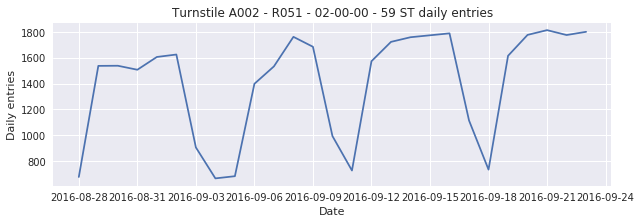

In [408]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('Date')
plt.ylabel('Daily entries');
plt.title('Turnstile A002 - R051 - 02-00-00 - 59 ST daily entries')
# plt.xticks(list(rrule(freq=WEEKLY, count=4, dtstart=list(dates)[0])))


#### Challenge 5

In [409]:
turnstiles_daily.DATE=pd.to_datetime(turnstiles_daily.DATE, format="%m/%d/%Y")

In [410]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2016-08-28,5800798,08/27/2016,5.800e+06,677.0
2,A002,R051,02-00-00,59 ST,2016-08-29,5802336,08/28/2016,5.801e+06,1538.0
3,A002,R051,02-00-00,59 ST,2016-08-30,5803875,08/29/2016,5.802e+06,1539.0
4,A002,R051,02-00-00,59 ST,2016-08-31,5805383,08/30/2016,5.804e+06,1508.0
5,A002,R051,02-00-00,59 ST,2016-09-01,5806990,08/31/2016,5.805e+06,1607.0


In [411]:
# get daily entries by ControlArea/Unit/Station combo
CA_Unit_station_daily = \
(turnstiles_daily.groupby(['C/A','UNIT','STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

CA_Unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2016-08-28,7896.0
1,A002,R051,59 ST,2016-08-29,15462.0
2,A002,R051,59 ST,2016-08-30,16622.0
3,A002,R051,59 ST,2016-08-31,16557.0
4,A002,R051,59 ST,2016-09-01,16464.0


#### Challenge 6

In [412]:
# get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())
stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2016-08-28,13871.0
1,1 AV,2016-08-29,18064.0
2,1 AV,2016-08-30,19182.0
3,1 AV,2016-08-31,19616.0
4,1 AV,2016-09-01,20170.0


#### Challenge 7

In [413]:
mask = (stations_daily["STATION"] == "59 ST")

dates=stations_daily[mask].DATE
counts=stations_daily[mask].DAILY_ENTRIES

In [414]:
dates = pd.to_datetime(dates, format="%m/%d/%Y")

Text(0.5,1,'59 ST daily entries')

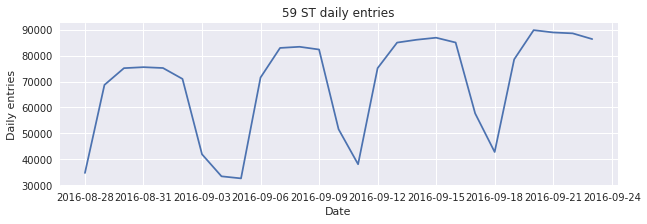

In [415]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('Date')
plt.ylabel('Daily entries');
plt.title('59 ST daily entries')
# plt.xticks(list(rrule(freq=WEEKLY, count=4, dtstart=list(dates)[0])))

#### Challenge 8

In [416]:
weekdays=dates.transform(lambda d : d.weekday())

In [417]:
weekdays.head()

2295    6
2296    0
2297    1
2298    2
2299    3
Name: DATE, dtype: int64

In [418]:
week1_count_list=counts[1:8]
week2_count_list=counts[8:15]
week3_count_list=counts[15:22]
x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5,1,'59 ST daily entries')

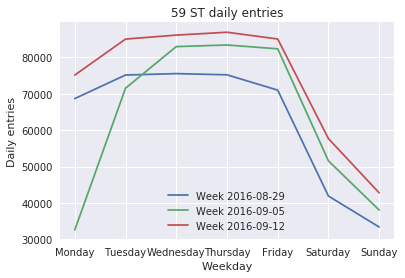

In [419]:
plt.plot(x,week1_count_list)
plt.plot(x,week2_count_list)
plt.plot(x,week3_count_list)
plt.legend(['Week '+str(list(dates.transform(lambda dt: dt.date()))[i]) for i in [1,8,15]])
plt.xlabel('Weekday')
plt.ylabel('Daily entries');
plt.title('59 ST daily entries')

#### Challenge 9

In [420]:
stations_daily['WEEK']=stations_daily.DATE.dt.week

In [421]:
stations_daily.head()

,STATION,DATE,DAILY_ENTRIES,WEEK
0,1 AV,2016-08-28,13871.0,34
1,1 AV,2016-08-29,18064.0,35
2,1 AV,2016-08-30,19182.0,35
3,1 AV,2016-08-31,19616.0,35
4,1 AV,2016-09-01,20170.0,35


In [422]:
# We select 3 complete weeks
stations_daily_subset=stations_daily[stations_daily.DATE.isin(dates[1:22])]

In [423]:
# Sum of daily entries for each station and each week
stations_weekly = \
(stations_daily_subset.groupby(['STATION','WEEK'])['DAILY_ENTRIES'].sum()
                 .reset_index()).sort_values(['WEEK','DAILY_ENTRIES'], ascending = [True,False])

In [424]:
stations_weekly.head()

,STATION,WEEK,DAILY_ENTRIES
183,34 ST-PENN STA,35,960076.0
690,GRD CNTRL-42 ST,35,839954.0
177,34 ST-HERALD SQ,35,708679.0
138,23 ST,35,670191.0
42,14 ST-UNION SQ,35,610450.0


In [425]:
# Station with highest traffic for each week
stations_weekly.groupby('WEEK').head(1)

,STATION,WEEK,DAILY_ENTRIES
183,34 ST-PENN STA,35,9.601e+05
184,34 ST-PENN STA,36,9.518e+05
185,34 ST-PENN STA,37,1.048e+06


Same thing with weekdays (in case I didn't understand the question).

In [426]:
# stations_daily['WEEKDAY']=stations_daily.DATE.transform(lambda d : d.weekday())

In [427]:
# stations_daily.head()

In [428]:
# Sum of daily entries for each station and weekday
# stations_weekday = \
# (stations_daily_subset.groupby(['STATION','WEEKDAY'])['DAILY_ENTRIES'].sum()
#                  .reset_index()).sort_values(['WEEKDAY','DAILY_ENTRIES'], ascending = [True,False])

In [429]:
# stations_weekday.head()

In [430]:
# Station with highest traffic for each weekday
# stations_weekday.groupby('WEEKDAY').head(1)

#### Challenge 10

In [431]:
total_ridership_counts=stations_weekly.DAILY_ENTRIES

(array([845., 170.,  47.,  20.,  10.,  12.,   8.,   3.,   2.,   3.]),
 array([      0. ,  104807.5,  209615. ,  314422.5,  419230. ,  524037.5,
         628845. ,  733652.5,  838460. ,  943267.5, 1048075. ]),
 <a list of 10 Patch objects>)

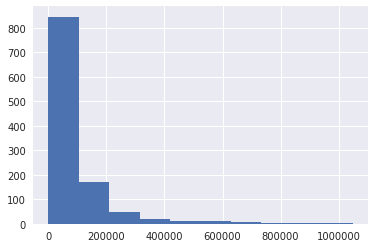

In [432]:
plt.hist(total_ridership_counts)

In [433]:
total_ridership_values=stations_weekly.sort_values('DAILY_ENTRIES',ascending=False).head(20).STATION

<BarContainer object of 20 artists>

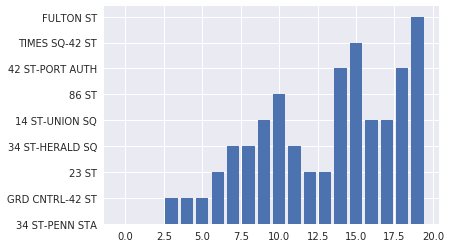

In [434]:
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)